## Deluppgift 1
Ev. kommentar:

In [1]:
import csv

# Jag definierar dessa variabler så att de är åtkomliga för alla funktioner
kpiData = []
livsmedelData = []
tjansteData = []

# Hjälpmetod för att läsa filer och returnera datat
def _read_file(file_name):
    data_list = []
    try:
        # Använder with så att filen stängs automatiskt när man lämnar scopet av with
        with open(file_name, "r", encoding="UTF-8") as file:
            csv_reader = csv.reader(file, delimiter=";")
            # Lägger till varje rad till listan
            for line in csv_reader:
                data_list.append(line)
    # Om inte filen finns skriver vi ut ett fel istället för att låta programmet krascha
    except FileNotFoundError:
        print(f"Filen {file_name} finns inte")
    return data_list


def read_data_files(kpi_file, livsmedel_file, tjanstedata_file):
    # Jag sätter variablerna till globala så att vi kan använda dem i efterkommmande funktioner
    global kpiData
    kpiData = _read_file(kpi_file)
    global livsmedelData
    livsmedelData = _read_file(livsmedel_file)
    global tjansteData
    tjansteData = _read_file(tjanstedata_file)

    # Skriv ut de första tre raderna i varje fil
    print(kpiData[:3])
    print("--------------")
    print(tjansteData[:3])
    print("--------------")
    print(livsmedelData[:3])


read_data_files("kpi-1.csv", "livsmedel-1.csv", "tjänster-1.csv")

[['År', 'Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'], ['2022', '350.56', '353.56', '359.8', '362.02', '365.82', '370.95', '371.28'], ['2021', '338.09', '339.01', '339.54', '340.37', '341.04', '341.32', '342.23', '343.99', '345.74', '346.44', '348.03', '352.47']]
--------------
[['', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], ['livsmedel och alkoholfria drycker', '100', '115.02', '129.31', '144.39', '161.22', '173.19', '185.62', '191.35', '201.84', '213.43', '228.8', '239.18', '226.88', '228.48', '232.43', '235.75', '219.36', '220.19', '222.69', '225.97', '225.98', '232.47', '240.02', '240.79', '239.74', '238.09', '239.91', '244.77', '261.69', '269.25', '273.1

## Deluppgift 2
Ev. kommentar:

För vilken månad som KPI ska presenteras? 5


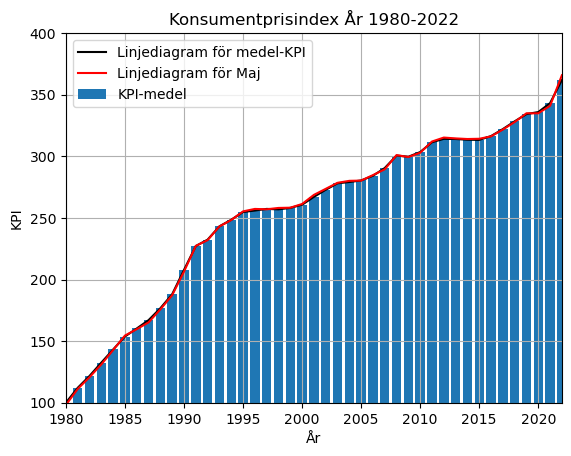

In [2]:
import matplotlib.pyplot as plt


# Hjälpmetod för att räkna ut medelvärde för år
def _calculate_mean_for_year(year):
    # Första kolumnen innehåller året, så den tar vi bort när vi räknar på medelvärdet
    # Jag använder mig av list comprehension för att göra om värden till float innan
    # beräkning av medelvärdet
    return sum([float(value) for value in year[1:]]) / (len(year) - 1)


def calculate_and_get_yearly_kpi_means(kpi_list):
    yearly_means = []
    for year in kpi_list:
        yearly_means.append(_calculate_mean_for_year(year))
    # Vi vill ha värden i stigande årtalsordning
    yearly_means.reverse()
    return yearly_means


# Hjälpfunktion för att hämta ut värden för en specifik månad
def _get_values_for_month(month):
    month_values = []
    # Jag hoppar över första raden eftersom den innehåller rubriker
    for year in kpiData[1:]:
        # Om användaren har valt en månad som inte har värde sätter vi den till None.
        if not len(year) - 1 < month:
            month_values.append(float(year[month]))
        else:
            month_values.append(None)
    return month_values


# Hjälpfunktion för att hämta KPI för en månad
def get_kpis_for_month(month):
    values = _get_values_for_month(month)
    # Vi vill ha värden i stigande årtalsordning
    values.reverse()
    return values


# Hjälpfunktion för att hämta alla år från filen
def get_years(list_of_years):
    years = []
    for year in list_of_years:
        # Året finns i första kolumnen
        years.append(int(year[0]))
    # Jag sorterar listan så att vi får åren i rätt ordning
    years.sort()
    return years


def plot_kpi_for_month():
    # Jag gör en oändlig loop tills användaren matar in ett accepterat värde
    while True:
        month = input("För vilken månad som KPI ska presenteras? ")
        try:
            # Om användaren matat in ett värde som inte kan konverteras till int så
            # slängs ett ValueError och loopen kör vidare.
            month = int(month)
            if month > 12 or month < 0:
                continue
            # Vi har fått ett giltigt månadsnummer
            break
        except ValueError:
            continue

    years = get_years(kpiData[1:])
    yearly_means = calculate_and_get_yearly_kpi_means(kpiData[1:])
    monthly_kpis = get_kpis_for_month(month)

    plt.plot(years, yearly_means, color="black", label="Linjediagram för medel-KPI")
    plt.bar(years, yearly_means, label="KPI-medel")
    plt.plot(
        years, monthly_kpis, color="red", label=f"Linjediagram för {kpiData[0][month]}"
    )
    plt.title("Konsumentprisindex År 1980-2022")
    plt.xlabel("År")
    plt.ylabel("KPI")
    # Här sätter jag startvärden för x- och y-axeln
    plt.xlim([1980, 2022])
    plt.ylim([100, 400])
    plt.grid()
    plt.legend()
    plt.show()


plot_kpi_for_month()

## Deluppgift 3
Ev. kommentar:

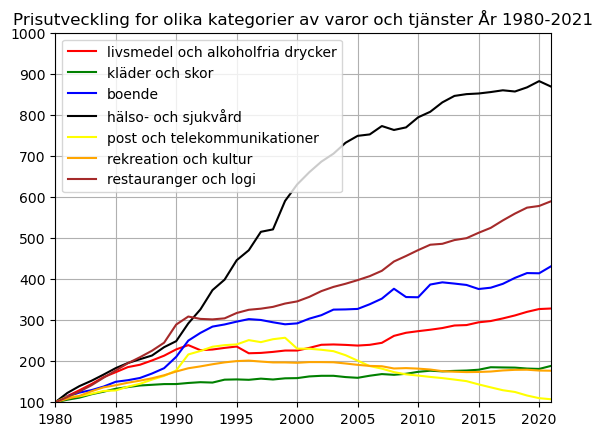

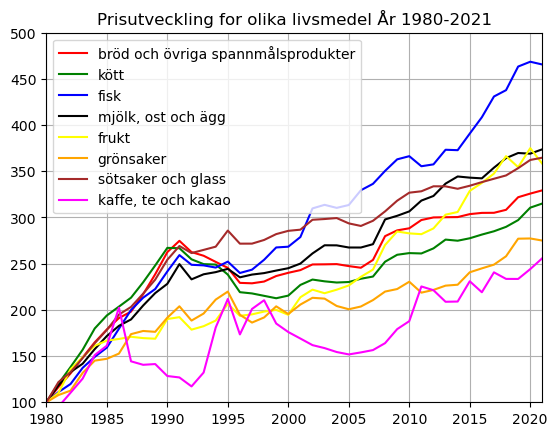

In [3]:
def plot_data(list_of_data):
    # Statisk lista med färger att sätta i grafen
    colors = ["red", "green", "blue", "black", "yellow", "orange", "brown", "magenta"]
    # Gör om strängar till en lista av int och skippar första kolumnen
    years = [int(year) for year in list_of_data[0][1:]]
    # Om första kolumnen i andra raden innehåller ordet "livsmedel" så är det tjänster
    if "livsmedel" in list_of_data[1][0]:
        plt.ylim([100, 1000])
        plt.title(
            f"Prisutveckling for olika kategorier av varor och tjänster "
            f"År {years[0]}-{years[len(years)-1]}"
        )
    else:
        plt.ylim([100, 500])
        plt.title(
            f"Prisutveckling for olika livsmedel År {years[0]}-{years[len(years)-1]}"
        )
    # Variabeln är till för att välja färg ur listan med färger
    i = 0
    for row in list_of_data[1:]:
        # Sätter x-limit till första och sista året i listan
        plt.xlim([years[0], years[len(years) - 1]])
        values = [float(value) for value in row[1:]]
        plt.plot(
            years,
            values,
            # Ett sätt att sätta ny färg dynamiskt
            color=colors[i],
            # Använd radbeskrivningen som label
            label=row[0],
        )
        i += 1
    plt.grid()
    plt.legend()
    plt.show()


def plot_data_for_categories():
    plot_data(tjansteData)
    plot_data(livsmedelData)


plot_data_for_categories()

## Deluppgift 4
Ev. kommentar:

+----------------------------------------------------------------------+
|Kategorier olika typer av livsmedel     |Prisutvecklingen i procentform
|bröd och övriga spannmålsprodukter      |229.38         
|kött                                    |215.13         
|fisk                                    |365.55         
|mjölk, ost och ägg                      |273.80         
|frukt                                   |258.05         
|grönsaker                               |175.00         
|sötsaker och glass                      |264.72         
|kaffe, te och kakao                     |155.98         
+----------------------------------------------------------------------+
|Kategorier av varor och tjänster        |Prisutvecklingen i procentform
|livsmedel och alkoholfria drycker       |228.36         
|kläder och skor                         |88.68          
|boende                                  |331.43         
|hälso- och sjukvård                     |768.47         
|post och te

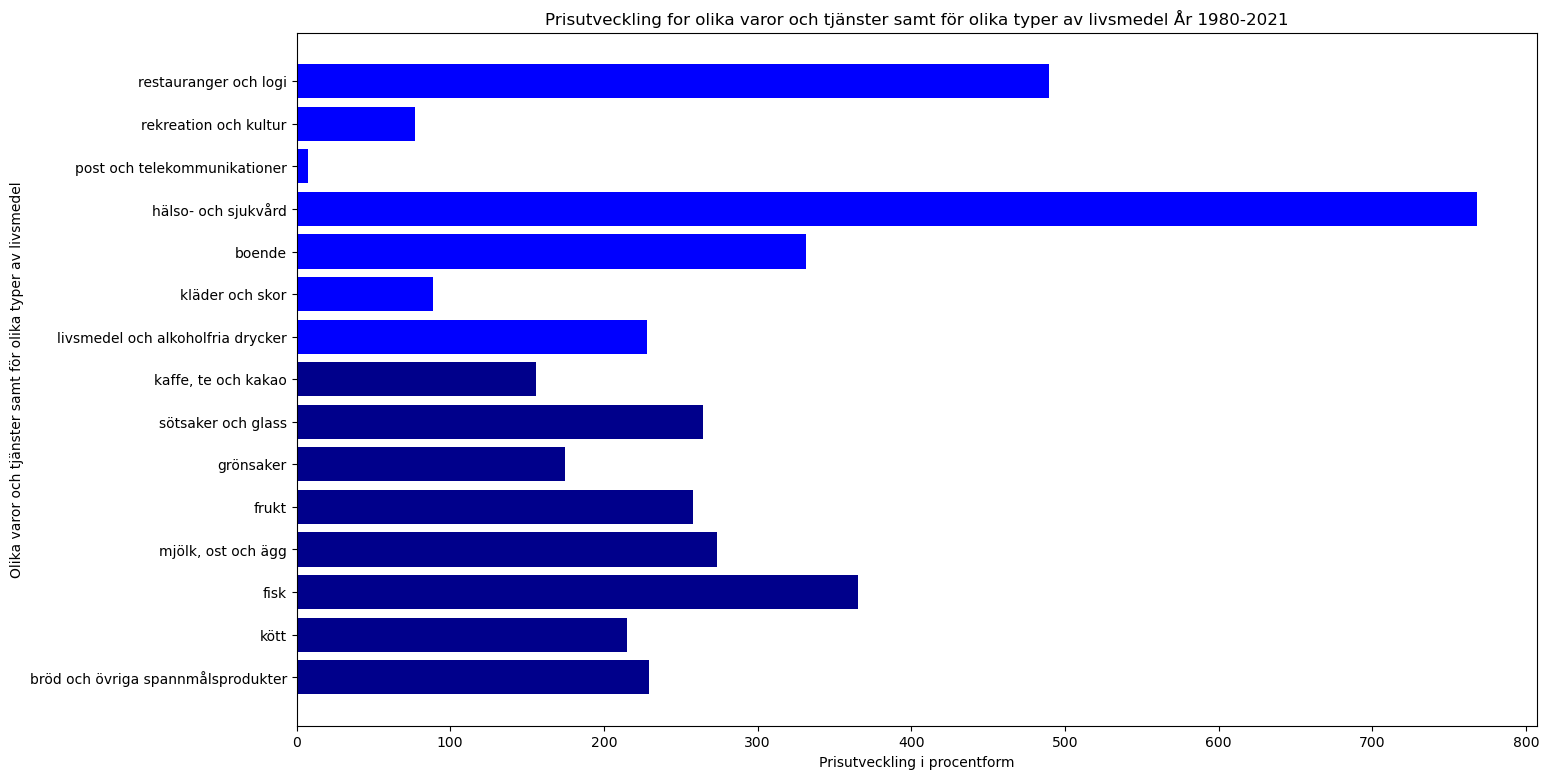

In [4]:
# Hjälpmetod för att räkna ut prisförändringen över tid
def _get_price_diff_for_category(values):
    # Vi subtraherar sista värdet med första värdet för att få reda på skillnaden
    return float(values[len(values) - 1]) - float(values[0])


def print_price_over_time(list_of_data):
    title = ""
    title2 = "Prisutvecklingen i procentform"
    print("+----------------------------------------------------------------------+")
    # Tar reda på vilken data och anpassar rubriker
    if "livsmedel" in list_of_data[1][0]:
        title = "Kategorier av varor och tjänster"
    else:
        title = "Kategorier olika typer av livsmedel"
    # Skriv ut rubrikerna
    print(f"|{title:<40}|{title2:<15}")
    # Skippa första raden med kollumnnamn
    for row in list_of_data[1:]:
        price_diff = _get_price_diff_for_category(row[1:])
        # Skriv ut kategorin, vänsterställd 40 tecken lång och skillnaden med två decimaler
        print(f"|{row[0]:<40}|{price_diff:<15.2f}")


def plot_price_over_time():
    groceries_categories = []
    groceries_price_changes = []
    # Hämta ut kategorier och prisutveckling för livsmedeldata
    for row in livsmedelData[1:]:
        groceries_categories.append(row[0])
        groceries_price_changes.append(_get_price_diff_for_category(row[1:]))

    services_categories = []
    services_price_changes = []
    # Hämta ut kategorier och prisutveckling för tjänster
    for row in tjansteData[1:]:
        services_categories.append(row[0])
        services_price_changes.append(_get_price_diff_for_category(row[1:]))

    # Sätt storleken på plotytan
    fig, ax = plt.subplots(figsize=(16, 9))

    # Ta fram start och slutår och ha i titeln
    plt.title(
        f"Prisutveckling for olika varor och tjänster samt för olika typer av "
        f"livsmedel År {tjansteData[0][1]}-{tjansteData[0][len(tjansteData[0])-1]}"
    )
    plt.xlabel("Prisutveckling i procentform")
    plt.ylabel("Olika varor och tjänster samt för olika typer av livsmedel")

    # Skapa en horizontell bar med livsmedel
    ax.barh(groceries_categories, groceries_price_changes, color="darkblue")

    # Skapa en horizontell bar med tjänstedata
    ax.barh(services_categories, services_price_changes, color="blue")

    plt.show()


def print_prices_over_time_and_plot():

    print_price_over_time(livsmedelData)
    print_price_over_time(tjansteData)

    plot_price_over_time()


print_prices_over_time_and_plot()

## Deluppgift 5
Ev. kommentar:

                   ANALYS AV KPI UNDER ÅREN 2000 - 2022                    
                            Största förändring                             
År                       %              Månad          Årsmedelvärde  
---------------------------------------------------------------
2000                     -0.81          Jan            260.72         
2001                     0.87           Apr            267.08         
2002                     0.89           Mar            272.84         
2003                     0.87           Feb            278.10         
2004                     0.76           Mar            279.15         
2005                     0.71           Sep            280.41         
2006                     -0.78          Jan            284.22         
2007                     1.00           Sep            290.51         
2008                     -1.34          Dec            300.61         
2009                     -0.46          Jul            299.66         
201

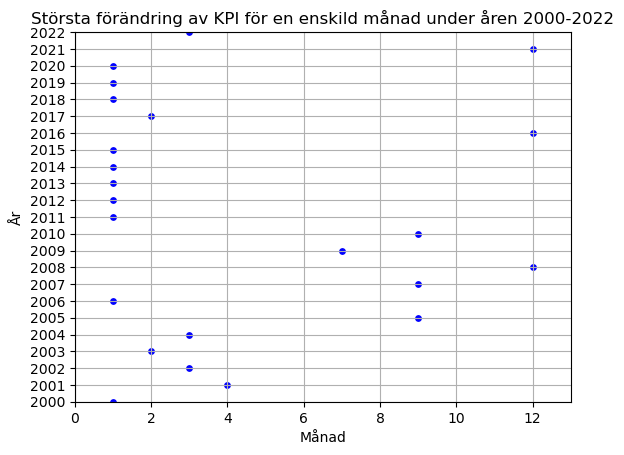

In [5]:
# Hjälpmetod för att beräkna kpi-skillnader mellan månader
def _get_KPI_diff_for_months_in_percent(month1, month2):
    # Vi vill returnera i procent
    return ((month1 - month2) / month2) * 100


# Hjälpmetod för att beräkna kpi-skillnader för ett givet år
def _get_biggest_KPI_diff_and_index_for_year(yearly_kpis):
    kpi_diffs = []
    i = 0
    for kpi in yearly_kpis:
        # Om i är 0 betyder det att vi är på första månaden och ska hoppa till nästa
        if i == 0:
            i += 1
            continue
        # Vi skickar in förra värdet för att beräkna mot månadens värde
        kpi_diff = _get_KPI_diff_for_months_in_percent(float(kpi), float(yearly_kpis[i - 1]))
        # Vi sparar skillnaden som absolut värde för att kunna beräkna största skillnaden
        kpi_diffs.append(kpi_diff)
        i += 1
        # Om i är lika stort som längden på listan (sista månaden) finns inga fler månader att beräkna
        if i == len(yearly_kpis):
            break

    # Här tar vi reda på vilken skillnad som är störst mellan minsta och största värde
    biggest_diff = (
        max(kpi_diffs) if abs(max(kpi_diffs)) >= abs(min(kpi_diffs)) else min(kpi_diffs)
    )
    # Vi returnerar den största skillanden samt indexet av det värde som är störst
    return biggest_diff, kpi_diffs.index(biggest_diff)


# Metod för att beräkna årliga KPI-skillnader för kpiData
def get_yearly_kpi_diffs():
    yearly_kpi_diffs = []
    yearly_kpis = []
    dec_value = None
    biggest_diff_all_time = 0
    biggest_diff_year = ""
    biggest_diff_month = ""
    # Vi vill beräkna från 2000 - 2022, men måste ta med december 1999
    kpi_data_reversed = kpiData[1:24]
    # Decembervärdet för 1999
    dec_value = kpiData[24:25][0][12]
    # Och vi vill räkna bakifrån så vänder på listan
    kpi_data_reversed.reverse()
    # Vi återanvänder metoden för att räkna ut yearly means
    yearly_means = calculate_and_get_yearly_kpi_means(kpiData[1:24])
    # Vi tar ut listan med månader och skippar första kolumnen som innehåller "År"
    months = kpiData[0][1:]
    # Vi använder den här variabeln för att ta fram det årliga medelvärdet
    i = 0
    for yearly_kpi in kpi_data_reversed:
        # Initierar tom dict att fylla med år och kpi-skillnad
        yearly_kpi_diff = {}
        yearly_kpis = yearly_kpi[1:]
        # Om vi har ett december-värde lägger vi till det först i listan av kpi:er
        if dec_value:
            yearly_kpis.insert(0, dec_value)

        # Vi hämtar ut indexet i listan som har störst skillnad
        biggest_diff, biggest_diff_index = _get_biggest_KPI_diff_and_index_for_year(
            yearly_kpis
        )
        # Vi räknar ut för vilken månad som maxvärdet finns
        if dec_value:
            # Om decembervärdet är insertat måste vi ta hänsyn till det
            month = months[biggest_diff_index]
        else:
            # Eftersom värden beräknas från februari adderar vi 1 månad
            month = months[biggest_diff_index + 1]

        if biggest_diff > biggest_diff_all_time:
            biggest_diff_all_time = biggest_diff
            biggest_diff_year = yearly_kpi[0]
            biggest_diff_month = month
        # Skapar en dict med de värden jag vill presentera i printen
        yearly_kpi_diff = {
            "year": yearly_kpi[0],
            "month": month,
            "biggest_diff": f"{biggest_diff:.2f}",
            "yearly_mean": f"{yearly_means[i]:.2f}",
        }
        yearly_kpi_diffs.append(yearly_kpi_diff)
        # Om året innehåller tolv månaders KPI sparar vi sista(dec) värdet
        if len(yearly_kpi[1:]) == 12:
            dec_value = yearly_kpis[len(yearly_kpis) - 1]
        i += 1
    yearly_kpi_diffs.append(
        {
            "all_time": {
                "diff": biggest_diff_all_time,
                "biggest_diff_year": biggest_diff_year,
                "biggest_diff_month": biggest_diff_month,
            }
        }
    )
    return yearly_kpi_diffs


# Metod för att printa beräkningen till tabell
def print_yearly_kpi_changes(yearly_kpi_diffs):
    print("================================================================")
    title = "ANALYS AV KPI UNDER ÅREN 2000 - 2022"
    # Börja skriv ut titeln 100 tecken in
    print(f"{title:^75}")
    sub_title = "Största förändring"
    print(f"{sub_title:^75}")

    print(f"{'År':<25}{'%':<15}{'Månad':<15}{'Årsmedelvärde':<15}")
    print("---------------------------------------------------------------")
    i = 0
    for item in yearly_kpi_diffs:
        if i < len(yearly_kpi_diffs) - 1:
            # För att göra koden mer lättläst skapar jag variabler av värden
            year = item["year"]
            biggest_diff = item["biggest_diff"]
            month = item["month"]
            yearly_mean = item["yearly_mean"]
            print(f"{year:<25}{biggest_diff:<15}{month:<15}{yearly_mean:<15}")
        else:
            # För att göra koden mer lättläst skapar jag variabler av värden
            biggest_diff = item["all_time"]["diff"]
            biggest_diff_month = item["all_time"]["biggest_diff_month"]
            biggest_diff_year = item["all_time"]["biggest_diff_year"]
            # Vi skriver ut en tom rad
            print("\n")
            print(
                f"{'Största förändring:':<25}{biggest_diff:<10.2f} \
                    {biggest_diff_month} {biggest_diff_year}"
            )
        i += 1

    print("================================================================")


def plot_yearly_kpi_changes(yearly_kpi_diffs):
    plt.title("Största förändring av KPI för en enskild månad under åren 2000-2022")
    plt.xlabel("Månad")
    plt.ylabel("År")
    # Jag väljer att sätta 0-13 som xlim så det blir lättare att se prickarna för 1 och 12
    plt.xlim([0, 13])
    plt.ylim([2000, 2022])

    plt.grid()
    years = []
    months = []
    # Vi vill bara ha datat för åren, inte största skillnaden så tar sista columnen
    for item in yearly_kpi_diffs[:-1]:
        # Vi ska bara ha data för åren 2000-2022
        if (int(item["year"])) >= 2000:
            years.append(int(item["year"]))
            # Vi måste ta fram en int-representation av månaden för att kunna plotta
            months.append(kpiData[0][1:].index(item["month"]) + 1)
    plt.yticks(years)
    plt.scatter(months, years, s=15, c="blue")
    plt.show()


def print_and_plot_kpi_changes():
    yearly_kpi_diffs = get_yearly_kpi_diffs()
    print_yearly_kpi_changes(yearly_kpi_diffs)
    plot_yearly_kpi_changes(yearly_kpi_diffs)


print_and_plot_kpi_changes()

## Deluppgift 6
Ev. kommentar:

Program för att läsa in och analysera resultatet i uppgift 1 - 5
1. Läser in csv-filerna
2. Konsumentprisindex för åren 1980 - 2022
3. Prisutvecklingen för de olika kategorierna i filerna "Varor och tjänster" samt "Livsmedel" under åren 1980 - 2021
4. Prisutvecklingen i procentform för de olika kategorierna i filerna "Varor och tjänster" samt "Livsmedel" under åren 1980 - 2021
5. Förändringar i KPI under åren 2000 - 2022
6. Avsluta programmet
Välj menyalternativ 1-6: 5
                   ANALYS AV KPI UNDER ÅREN 2000 - 2022                    
                            Största förändring                             
År                       %              Månad          Årsmedelvärde  
---------------------------------------------------------------
2000                     -0.81          Jan            260.72         
2001                     0.87           Apr            267.08         
2002                     0.89           Mar            272.84         
2003                     0

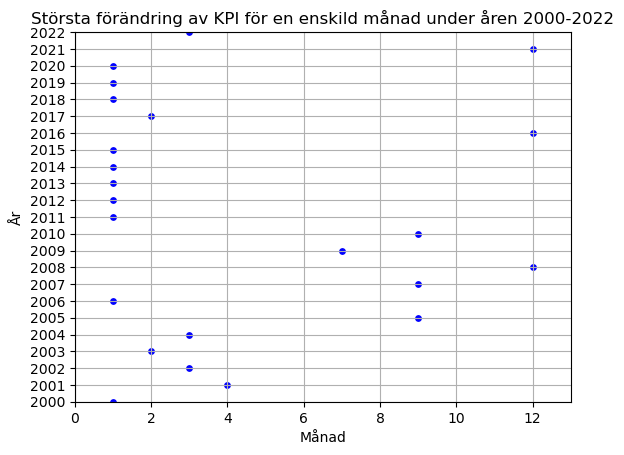

In [ ]:
def run_main_program():
    # privat hjälpmetod för att kolla om datat har laddats
    def check_if_data_is_loaded():
        # Om datat är tomt så kan man inte använda de andra funktionerna
        if len(kpiData) == 0 and len(livsmedelData) == 0 and len(tjansteData) == 0:
            print("Du måste ladda data innan du kan använda denna funktion")
            return False
        return True

    print("Program för att läsa in och analysera resultatet i uppgift 1 - 5")
    print("1. Läser in csv-filerna")
    print("2. Konsumentprisindex för åren 1980 - 2022")
    print(
        '3. Prisutvecklingen för de olika kategorierna i filerna "Varor och tjänster" samt "Livsmedel" under åren 1980 - 2021'
    )
    print(
        '4. Prisutvecklingen i procentform för de olika kategorierna i filerna "Varor och tjänster" samt "Livsmedel" under åren 1980 - 2021'
    )
    print("5. Förändringar i KPI under åren 2000 - 2022")
    print("6. Avsluta programmet")

    while True:
        try:
            # Om användaren matat in ett värde som inte kan konverteras till int så
            # slängs ett ValueError och loopen kör vidare.
            selected_menu_item = int(input("Välj menyalternativ 1-6: "))
        except ValueError:
            continue
        if selected_menu_item == 1:
            file_kpi = input("Ange filnamn för KPI-filen (kpi-1.csv): ") or "kpi-1.csv"
            file_livsmedel = (
                input("Ange filnamn för livsmedel-filen (livsmedel-1.csv): ")
                or "livsmedel-1.csv"
            )
            file_tjanstedata = (
                input("Ange filnamn för tjänstedata-filen (tjänster-1.csv): ")
                or "tjänster-1.csv"
            )
            read_data_files(file_kpi, file_livsmedel, file_tjanstedata)
        if selected_menu_item == 2:
            if check_if_data_is_loaded():
                plot_kpi_for_month()
        if selected_menu_item == 3:
            if check_if_data_is_loaded():
                plot_data_for_categories()
        if selected_menu_item == 4:
            if check_if_data_is_loaded():
                print_prices_over_time_and_plot()
        if selected_menu_item == 5:
            if check_if_data_is_loaded():
                print_and_plot_kpi_changes()
        if selected_menu_item == 6:
            print("Programmet avslutas")
            break


run_main_program()